<a href="https://colab.research.google.com/github/b-li111/linearModels/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Linear Models
## Do three questions.
### `! git clone https://github.com/ds4e/linearModels`

**Q1.** Please answer the following questions in your own words.

1. What makes a model "linear"? "Linear" in what?
2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)
3. Can linear regression be used for classification? Explain why, or why not.
4. What are signs that your linear model is over-fitting?
5. Clearly explain multi-colinearity using the two-stage least squares technique.
6. How can you incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$ into your analysis?
7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

1. A model is linear if the relationship between a variable and the outcome is a straight line. It's "linear" in terms of the coefficients-- the coefficients can only be multiplication division addition subtraction-- no exponents.
2. The coefficient for a dummy variable shows the difference between the control group (where the dummy is 0) and the treatment group (where the dummy is 1). With an intercept, teh coefficient shows how different the outcome is *from the untreated category*. Without an intercept, the coefficient simply shows the outcome/result, not the difference between control and treatment.
3. No, you'd need logistic regression. Linear regression is for numerical vallues, not categories (for classification). I'm sure you could make it work if you tried.. like create thresholds for categories. But just use logistic regression.
4. The main one is if your model performs great on a training set, but isn't very accurate on a test set. That means your model is trained to closely/specifically on the data provided, and can't generalize to new data. Also if the model starts making a super specific pattern instead of a general linear trend, probably overfit. Also if there are a ton of variables/predictors-- might become too specific and lead to noise.  
5. Basically it's when two factors are highly correlated, making it hard to distinguish each factor's individual effects for the model. Two-stage least sqaures provides an instrumental variable (related to one of the factors, but not directly tied to outcome). This helps the model figure out the effects of each factor on teh outcome, making it more accurate.
6. You can use polynomials (exponents) and logs. You can also multiply factors together to get non-linear relationships.
7. The intercept is the predicted value when all the factors are at 0. The slope coefficient shows the impact on the outcome when a predictive factor is increased by a single unit of measurement. The coefficient for a dummy/one-hot-encoded variable shows the differece in outcome between the control (dummy is 0) and treated (dummy is 1) group. A positive coefficient means the predicted outcome of the treated group is higher, and vice versa.

**Q4.** This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived for three years, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the **average treatment effect**.
2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?

In [29]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
df = pd.read_csv("heart_hw.csv")
df.head(20)
df['transplant_dummy'] = (df['transplant'] == 'treatment').astype(int)
control_survival_rate = df[df['transplant'] == 'control']['y'].mean()
treatment_survival_rate = df[df['transplant'] == 'treatment']['y'].mean()
print( "control survival:", control_survival_rate)
print("treatment survival:", treatment_survival_rate)
average_treatment_effect = treatment_survival_rate - control_survival_rate
print("avg treatment effect:", average_treatment_effect)

control survival: 0.11764705882352941
treatment survival: 0.34782608695652173
avg treatment effect: 0.23017902813299232


In [34]:
X = df[['transplant_dummy']]
y = df['y']
model = LinearRegression().fit(X, y)
print("intercept:", model.intercept_)
print("coefficient on transplant:", model.coef_[0])

intercept: 0.1176470588235293
coefficient on transplant: 0.23017902813299249


2. The intercept is the same as the control from pt 1, predicting the survival rate, which was about 11%.
 The transplant coefficient matches the average treatment effect from part 1, increasing the survival rate by about 23%, to an overall treatment survival likelihood of 35ish%. So the transplant coefficient and the average treatment effect are, in essence, the same.   

In [41]:
X = df[['transplant_dummy', 'age']]
model = LinearRegression().fit(X, y)
print("intercept:", model.intercept_)
print("coefficient transplant:", model.coef_[0])
print("coefficient age:", model.coef_[1])

intercept: 0.7019569721740947
coefficient transplant: 0.2647016865036751
coefficient age: -0.013607217160218647


3. The intercept goes up significantly, to around .7, because it factors in age, so this is the survival rate for a patient where age = 0. As age increases, that survival rate will decreases since the age coefficient is negative.

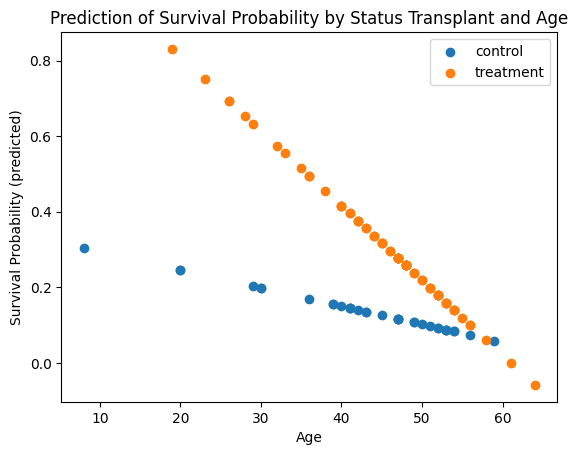

intercept: 0.35486517529945855
coefficient transplant: 0.9077513885685898
coefficient age: -0.0055242575069736986
coefficient interaction: -0.01459063825685528


In [47]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression().fit(X_train, y_train)
df['predicted'] = model.predict(X)

plt.scatter(df[df['transplant_dummy'] == 0]['age'],
            df[df['transplant_dummy'] == 0]['predicted'],
            label='control')

plt.scatter(df[df['transplant_dummy'] == 1]['age'],
            df[df['transplant_dummy'] == 1]['predicted'],
            label='treatment')

plt.title('Prediction of Survival Probability by Status Transplant and Age')
plt.xlabel('Age')
plt.ylabel('Survival Probability (predicted)')
plt.legend()
plt.show()


df['age_transplant_interaction'] = df['age'] * df['transplant_dummy']
X = df[['transplant_dummy', 'age', 'age_transplant_interaction']]
model = LinearRegression().fit(X, y)
print("intercept:", model.intercept_)
print("coefficient transplant:", model.coef_[0])
print("coefficient age:", model.coef_[1])
print("coefficient interaction:", model.coef_[2])

4. Basically, treatment seems to be more effective for younger patients, and decreases in effectiveness as age increases. The negative interaction term shows that as age increases the benefits of a transplant decrease.

5. While it's important to maximize the benefits of limited heart transplants, which would lead more young people to receive them, it could also be dangerous if ONLY young people suddenly receive them. It's important for all members of a community (city, state, country) to feel cared for in a medical system, not just "high priority" individuals. This is also a very limited model-- the model needed would be extraordinarily massive, and there would have to be an incredible amount of caveats-- basically, you'd end up having to go an a case-by-case basis anyways. Also these kinds of models are based on past data. Maybe there were improper practices, historical inequities, etc., that led to these results.. there are just a lotttt of issues with using such models to decide who does and doesn't receive a transplant.

**Q7.** In class, we showed that for the single linear regression model,
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

1. When will $b^*$ be large or small, depending on the relationship between $X$ and $Y$ and the variance of $X$?
2. Suppose you have measurement error in $X$ which artificially inflates its variance (e.g. bad data cleaning). We'll model this as saying the "real" value of $X$ for observation $i$ is $z_i$, but we observe $x_i = z_i + n_i$, where $n_i$ is the added noise. Does this affect the intercept of the regression? What happens to the $b^*$ coefficient relative to a noise-less model? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
3. Suppose the noise $n_i$ is independent of $z_i$ and $y_i$, so that (approximately)
$$
\dfrac{1}{N} \sum_{i=1}^N (y_i - \bar{y})(n_i - \bar{n}) =0, \quad \dfrac{1}{N} \sum_{i=1}^N (z_i - \bar{z})(n_i - \bar{n}) =0.
$$
and that the mean of the bias is zero, so that
$$
\dfrac{1}{N} \sum_{i=1}^N n_i = 0.
$$
In this case, the noise $n_i$ is zero on average and independent of the values of $x_i$ and $y_i$: It's just measurement error or lazy data cleaning.
Explain the intuition of your result.

4. How does attenuation factor into the cost-benefit analysis of gathering higher quality data or cleaning it more carefully?

1. B depends on the covariance/correlation between X and Y, so the larger the covariance/correlation, the larger the slope. Also the larger the variance for X(aka more widely spread from the mean), the smaller the slope, since it would create a larger denominator.
2. B gets smaller (as mentioned in part 1) because the denominator is getting larger with more Ni. It doesn't affect the intercept as much, but if it causes the slope to become smaller, it'll make the intercept shift in the other direction to compensate, btu definitely not as much. Overall it makes predictions less powerful because the model will underestimate the relationship between X and Y-- it's not just overestimation that's dangerous. Underestimation is just as inaccurate.
3. Noise is random error/lazy data cleaning -- on average, it balances out. If you're measuring jelly beans in a cup for example, someitmes you count one extra, sometimes you count one less. But on average, the noise/errors cancel out. Noise increases X's variance, making the slope smaller and underestimate the impact of changes to X. The intercept, on the other hand, isn't nearly as affected, since from my understanding, the noise averages to 0. This model will still pick up the general relationships/trends, but a smaller slope might lead it to underestimate the relationship, making the patterns/relations seem smaller over time than they are.
4. Attenuation factor means noise weakens the slope, which could underestimate the pattern/relationship. I think this strengthens the case for gathering higher quality data (even if expensive) in instances where tiny changes can have significant impacts. For example, with medical models. if better data can save one extra life, then it seems worth the money to invest. However, if it's something less life-and-death (like the relationship between the sale of iced vs hot coffee beverages and temperature or somethign) it seems less important-- as long as you can identify the overall trend, that's what really matters. So I guess it depends on the stakes involved, and the marginal benefit of collecting more accurate data/reducing noise.